<a href="https://colab.research.google.com/github/IamShivamJaiswal/Stock-Prediction/blob/master/stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/IamShivamJaiswal/Stock-Prediction

Cloning into 'Stock-Prediction'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 16 (delta 4), reused 9 (delta 1), pack-reused 0
Unpacking objects: 100% (16/16), done.


In [2]:
%cd Stock-Prediction/

/content/Stock-Prediction


# Stocks Prediction

In [3]:
import pandas as pd
import datetime
#import pandas_datareader.data as web
from pandas import Series, DataFrame


# start = datetime.datetime(2018, 9, 6)
# end = datetime.datetime(2019, 9, 6)

#df = web.DataReader("AAPL", 'yahoo', start, end)
df = pd.read_csv("data/AAPL.csv",header=0, parse_dates=[0], index_col=0,)
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-30,210.160004,210.449997,207.199997,208.740005,208.740005,21143400
2019-09-03,206.429993,206.979996,204.220001,205.699997,205.699997,20023000
2019-09-04,208.389999,209.479996,207.320007,209.190002,209.190002,19188100
2019-09-05,212.000000,213.970001,211.509995,213.279999,213.279999,23913700
2019-09-06,214.050003,214.410004,212.509995,213.259995,213.259995,17671839


## Exploring the data 

First we will need to explore the data.
This means understanding the stocks data trend thoroughly by finding key measures
* rolling mean (moving average) -- to determine trend
* return deviation -- to determine return deviation

In [4]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=10).mean()
mavg.tail(10)

Date
2019-08-23    206.889001
2019-08-26    207.490002
2019-08-27    207.009003
2019-08-28    207.287002
2019-08-29    208.014001
2019-08-30    208.238002
2019-09-03    207.773001
2019-09-04    207.656001
2019-09-05    207.720001
2019-09-06    207.800000
Name: Adj Close, dtype: float64

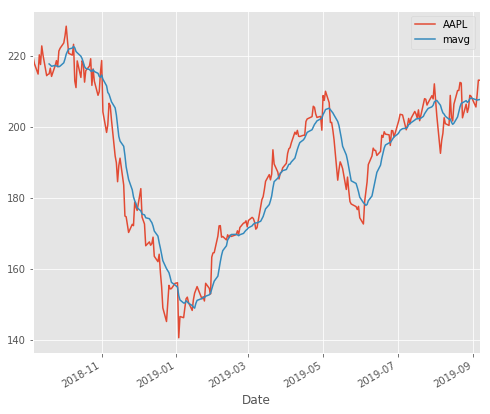

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(8, 7))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label='AAPL')
mavg.plot(label='mavg')
plt.legend()

Returns defined as: 
$$ $$
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [6]:
rets = close_px / close_px.shift(1) - 1
rets.head()


Date
2018-09-06         NaN
2018-09-07   -0.008068
2018-09-10   -0.013421
2018-09-11    0.025283
2018-09-12   -0.012419
Name: Adj Close, dtype: float64

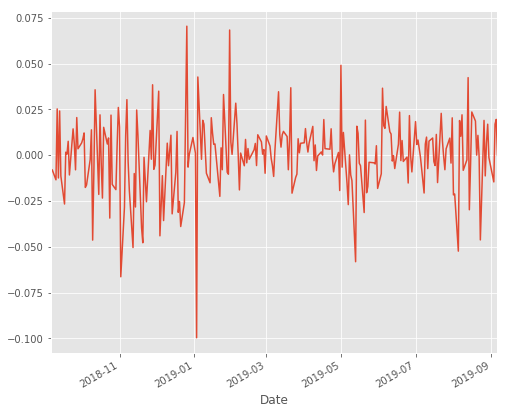

In [7]:
rets.plot(label='return')

# Predicting the stocks price

To predict the return of the stocks in the next period - Prediction analysis
* Simple Linear Analysis
* Quadratic Linear Analysis (QDA)
* K Nearest Neighbor (KNN)

But first, let us extract the necessary columns first from df:
* Adj Close
* Adj Volume
* HL Percentage
* PCT Change

In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-09-06,226.229996,227.350006,221.300003,223.100006,219.690903,34290000
2018-09-07,221.850006,225.369995,220.710007,221.300003,217.918411,37619800
2018-09-10,220.949997,221.850006,216.470001,218.330002,214.993759,39516500
2018-09-11,218.009995,224.300003,216.559998,223.850006,220.429443,35749000
2018-09-12,224.940002,225.000000,219.839996,221.070007,217.691925,49278700


In [9]:
dfreg = df.loc[:,["Adj Close","Volume"]]
dfreg["HL_PCT"] = (df["High"] - df["Low"]) / df["Close"] * 100.0
dfreg["PCT_change"] = (df["Close"] - df["Open"]) / df["Open"] * 100.0
dfreg

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2018-09-06,219.690903,34290000,2.711790,-1.383543
2018-09-07,217.918411,37619800,2.105733,-0.247917
2018-09-10,214.993759,39516500,2.464162,-1.185786
2018-09-11,220.429443,35749000,3.457675,2.678781
2018-09-12,217.691925,49278700,2.334104,-1.720457
2018-09-13,222.950317,41706400,2.552890,1.292949
2018-09-14,220.419571,31999300,1.929946,-0.846070
2018-09-17,214.550659,37195100,2.606936,-1.922120
2018-09-18,214.905167,31571700,2.167344,0.206627


In [10]:
import math
import numpy as np
from sklearn import preprocessing 
from sklearn.model_selection  import train_test_split

# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

print(dfreg.shape)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

print('Dimension of X',X.shape)
print('Dimension of y',y.shape)

(252, 4)
Dimension of X (249, 4)
Dimension of y (249,)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model Generation

* To predict the return of the stocks in the next period - Prediction analysis
    * Simple Linear Analysis
    * Quadratic Linear Analysis (QDA)
    * K Nearest Neighbor (KNN)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [13]:

# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)


# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)
    
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

## Test the model

In [0]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

In [15]:
print("The linear regression confidence is ",confidencereg)
print("The quadratic regression 2 confidence is ",confidencepoly2)
print("The quadratic regression 3 confidence is ",confidencepoly3)
print("The knn regression confidence is ",confidenceknn)

The linear regression confidence is  0.9245853976153099
The quadratic regression 2 confidence is  0.9234126551231738
The quadratic regression 3 confidence is  0.6903760789372473
The knn regression confidence is  0.8339588197165175


This means that the linear regression holds the most accuracy of it as being linear and justify the trend of stocks as being linear most of the times. 

However this does not mean we can just put stocks in it. There are still many issues to consider, especially with different companies that have different price trajectories over time. Google really is very linear: Up and to the right. Many companies aren't, so keep this in mind. 

We need to plot out the graph to make the most sense of it 

In [16]:
# Printing the forecast
forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
print(forecast_set, confidencereg, forecast_out)

[209.41473339 212.83273827 213.76254771] 0.9245853976153099 3


# Plotting the Prediction

In [0]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

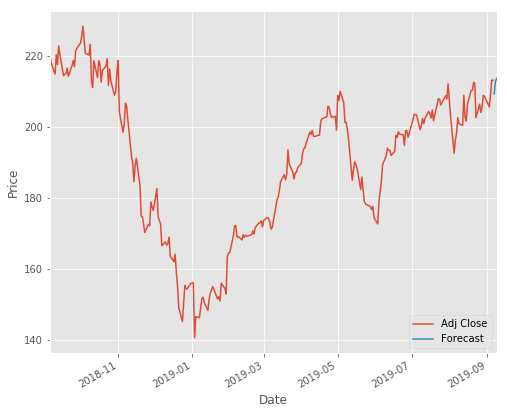

In [18]:
dfreg['Adj Close'].tail(500).plot()
dfreg['Forecast'].tail(500).plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()